In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [57]:
site = "Storelva"
fpath = r'../data/sensor_%s.csv' % site

sensor_df_hourly = pd.read_csv(fpath, index_col=1, parse_dates=True, na_values="NA")
sensor_df_hourly = sensor_df_hourly.drop('station_name', axis=1)
sensor_df_hourly.columns = ["CDOM", "Conductivity", "pH", "Temp", "Turbidity"]
sensor_df_hourly

,CDOM,Conductivity,pH,Temp,Turbidity
datetime,,,,,
2015-02-26 12:42:00+00:00,69.279049,4.046,6.23,1.35,1.54
2015-02-26 13:42:00+00:00,69.591887,4.046,6.23,1.40,1.53
2015-02-26 14:42:00+00:00,69.539249,4.056,6.23,1.39,1.52
2015-02-26 15:42:00+00:00,69.614022,4.041,6.22,1.39,1.50
2015-02-26 16:42:00+00:00,69.757939,4.039,6.22,1.37,1.50
...,...,...,...,...,...
2021-12-31 20:46:00+00:00,71.688667,4.028,6.25,2.34,1.12
2021-12-31 21:46:00+00:00,71.798334,3.981,6.25,2.34,1.08
2021-12-31 22:46:00+00:00,NaN,3.966,6.25,2.31,1.13


In [58]:
sensor_df = sensor_df_hourly.resample('D').mean()
# Drop time info for joining and plotting
sensor_df.index = sensor_df.index.date
sensor_df

,CDOM,Conductivity,pH,Temp,Turbidity
2015-02-26,69.595352,4.119083,6.225000,1.400000,1.491667
2015-02-27,67.025360,4.123375,6.220833,1.477083,3.252917
2015-02-28,68.732431,4.108458,6.210417,1.515417,2.157500
2015-03-01,65.579051,4.167583,6.112500,1.657083,4.586667
2015-03-02,67.321326,4.019708,NaN,1.737917,3.395000
...,...,...,...,...,...
2021-12-27,69.972898,3.979625,6.125833,1.400417,1.060000
2021-12-28,70.877661,3.965333,6.180833,1.825000,1.190417
2021-12-29,70.688119,3.807042,6.212500,2.008333,1.149167
2021-12-30,71.515138,4.000500,6.243750,2.283750,1.053750


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

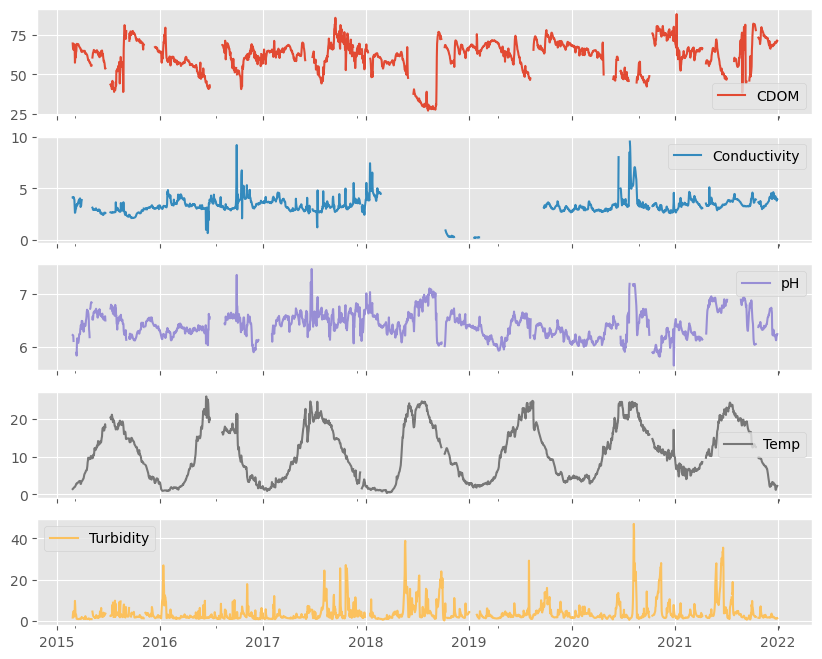

In [60]:
sensor_df.plot(subplots=True, sharex=True, figsize=(10, 8))

In [61]:
met_fpath = r"../data/Climate_%s_daily.csv" % site
met_df = pd.read_csv(met_fpath, index_col=0, parse_dates=True, dayfirst=False)
met_df = met_df[['par', 'value_mean']]
met_df = met_df.pivot(columns='par')
met_df = met_df.droplevel(level=0, axis=1)
met_df.head()

par,rr,tm
Date,,
2015-01-01,0.0,2.5
2015-01-02,1.3,6.7
2015-01-03,2.1,2.8
2015-01-04,0.4,1.1
2015-01-05,0.0,-0.8


In [62]:
q_df = pd.read_csv(r'../data/Discharge_%s.csv' % site, index_col=0, parse_dates=True)

# Drop time info for joining and plotting
q_df.index = q_df.index.date

q_series = q_df['value']
q_series.name = 'Q'
q_series

2015-01-01    5.250791
2015-01-02    5.574467
2015-01-03    5.959798
2015-01-04    5.508568
2015-01-05    5.239527
                ...   
2021-12-26    8.619706
2021-12-27    8.003234
2021-12-28    7.935480
2021-12-29    7.616905
2021-12-30    7.498725
Name: Q, Length: 2556, dtype: float64

In [63]:
chem_df = pd.read_csv(r'../data/waterchem_%s.csv' % site, index_col=1, parse_dates=True)
# Drop time info for joining and plotting
chem_df.index = chem_df.index.date
chem_df.head()

,station_name,pH,Conductivity_mS_m,SPM_mg_L,TOC_mg_L,Turbidity_NTU,PO4_ug_L,TP_ug_L,NO3_ug_L,NH4_ug_L,TN_ug_L,Si_mg_L,Ca_mg_L,DOC_mg_L,PartC_ug_L,PartN_ug_L,TDP_ug_L
2017-02-06,Storelva,6.29,3.12,1.74,6.0,1.10,2.0,7,200,32.0,430.0,1.68,1.72,5.9,NaN,NaN,2.0
2017-03-08,Storelva,6.36,2.81,1.40,5.8,1.10,NaN,12,200,8.0,440.0,1.62,1.55,5.8,518.0,34.8,2.0
2017-04-04,Storelva,6.35,2.65,1.56,5.8,0.82,1.0,7,250,15.0,400.0,1.55,1.54,5.6,295.0,22.2,3.0
2017-05-02,Storelva,6.40,2.96,2.48,5.8,1.80,3.0,7,250,25.0,440.0,1.36,1.66,5.5,439.0,37.3,2.0
2017-06-12,Storelva,6.52,2.89,2.46,7.3,1.50,5.0,6,100,22.0,400.0,1.20,1.51,7.1,634.0,81.9,3.0


# To do

* Further QC of sensor data (Leah or Maeve):
    * Målselva:
        * Drop 2017 (missing data)
        * FDOM: maybe drop 2021, or correct for step change
        * pH: drop dodgy low points. At least 3 points to remove.
    * Storelva:
        * Conductivity: delete points with conductivity below 2
        * (Why so many FDOM gaps? Is it FDOM or CDOM?)
* Maeve: re-do plots, regressions, plots and calcs based on regressions, etc. with cleaned data
* Leah:
    * Join time series and put on one stacked plot. Dashed lines for when grab samples were taken.
    * Correlation between air temp, discharge and sensor data, incl. GoF stats
    * Split into different periods: baseflow, snow melt, summer/autumn flow events
    * QC relationships for whole period vs the 3 different periods? Plots, summary stats.
    * Think about picking out individual events to demonstrate value of sensor data